Saving fitness_prediction_final.csv to fitness_prediction_final.csv
   current_weight  daily_calories  weekly_workout_minutes  weeks_ahead  \
0       74.967142     2777.853264                     487            2   
1       68.617357     3072.824992                     364            1   
2       76.476885     2080.429728                     376           10   
3       85.230299     2668.890771                      68            2   
4       67.658466     2304.807229                     132           10   

   predicted_weight  
0         66.925428  
1         64.949276  
2         47.682377  
3         85.769996  
4         63.963680  
       current_weight  daily_calories  weekly_workout_minutes  weeks_ahead  \
count      500.000000      500.000000              500.000000   500.000000   
mean        70.068380     2509.547835              333.008000     6.050000   
std          9.812532      293.399159              154.461518     3.071542   
min         37.587327     1690.934007      

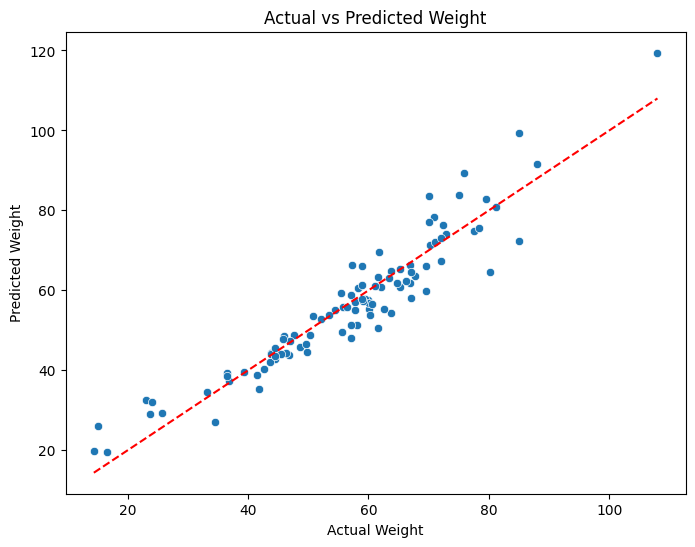

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'predicted_weight': np.float64(65.3), 'weight_change': np.float64(-4.7)}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
# Step 1: Install required packages
!pip install pandas scikit-learn matplotlib seaborn

# Step 2: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from google.colab import files

# Step 3: Upload CSV file
uploaded = files.upload()
df = pd.read_csv("fitness_prediction_final.csv")

# Step 4: Explore dataset
print(df.head())
print(df.describe())

# Step 5: Features and target
features = ["current_weight", "daily_calories", "weekly_workout_minutes", "weeks_ahead"]
target = "predicted_weight"

X = df[features]
y = df[target]

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Step 10: Visualization (Actual vs Predicted)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()

# Step 11: Save model as .pkl
with open("fitness_prediction_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Step 12: Download model file
files.download("fitness_prediction_model.pkl")

# Step 13: Example prediction (matches your backend structure)
example_data = {
    'current_weight': 70,
    'daily_calories': 2500,
    'weekly_workout_minutes': 180,
    'weeks_ahead': 6
}

example_features = [[
    float(example_data['current_weight']),
    float(example_data['daily_calories']),
    float(example_data['weekly_workout_minutes']),
    int(example_data['weeks_ahead'])
]]

predicted_weight = model.predict(example_features)[0]
weight_change = predicted_weight - float(example_data['current_weight'])

print({
    'predicted_weight': round(predicted_weight, 2),
    'weight_change': round(weight_change, 2)
})
